In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [22]:
diamonds_test = pd.read_csv('../BBDDs/diamonds_test.csv')
diamonds_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19


In [23]:
diamonds_train = pd.read_csv('../BBDDs/diamonds_train.csv')
diamonds_train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [24]:
diamonds_test.describe()

,id,carat,depth,table,x,y,z
count,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000
mean,6742.000000,0.798642,61.739095,57.490337,5.736454,5.739648,3.543474
std,3892.928525,0.469399,1.435310,2.237109,1.113671,1.128507,0.731005
min,0.000000,0.200000,50.800000,51.000000,0.000000,0.000000,0.000000
25%,3371.000000,0.400000,61.000000,56.000000,4.730000,4.730000,2.920000
50%,6742.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000
75%,10113.000000,1.040000,62.500000,59.000000,6.530000,6.530000,4.040000
max,13484.000000,5.010000,79.000000,73.000000,10.740000,31.800000,31.800000


In [25]:
diamonds_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       13485 non-null  int64  
 1   carat    13485 non-null  float64
 2   cut      13485 non-null  object 
 3   color    13485 non-null  object 
 4   clarity  13485 non-null  object 
 5   depth    13485 non-null  float64
 6   table    13485 non-null  float64
 7   x        13485 non-null  float64
 8   y        13485 non-null  float64
 9   z        13485 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.0+ MB


In [26]:
diamonds_train.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


In [27]:
diamonds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [28]:
#ej. para usar datos
diamonds_train['carat'].unique

<bound method Series.unique of 0        1.21
1        0.32
2        0.71
3        0.41
4        1.02
         ... 
40450    1.34
40451    2.02
40452    1.01
40453    0.33
40454    1.24
Name: carat, Length: 40455, dtype: float64>

<AxesSubplot:xlabel='table', ylabel='Count'>

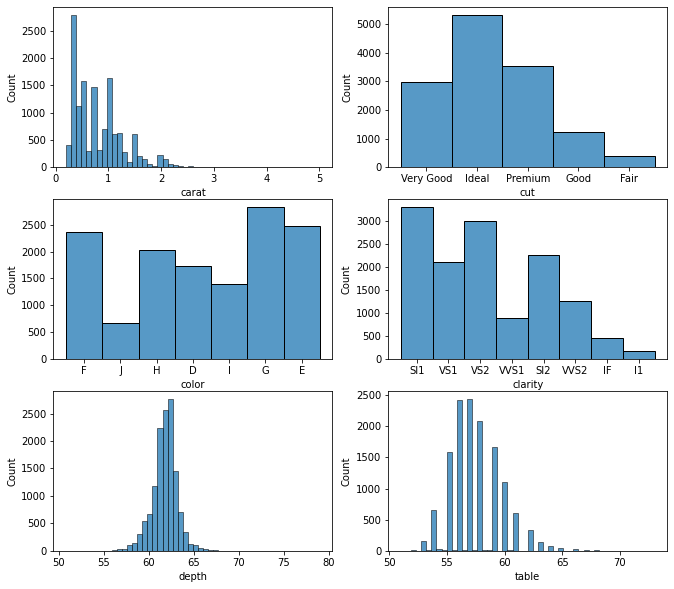

In [33]:
f, axes = plt.subplots(3,2, figsize=(11,10))

sns.histplot(data=diamonds_test, x = 'carat', bins = 50, ax=axes[0,0])
sns.histplot(data=diamonds_test, x = 'cut', ax=axes[0,1])
sns.histplot(data=diamonds_test, x = 'color', ax=axes[1,0])
sns.histplot(data=diamonds_test, x = 'clarity', ax=axes[1,1])
sns.histplot(data=diamonds_test, x = 'depth', bins = 50, ax=axes[2,0])
sns.histplot(data=diamonds_test, x = 'table', bins = 50, ax=axes[2,1])

In [30]:
corr = diamonds_test.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,carat,depth,table,x,y,z
id,1.000000,-0.002578,-0.002425,0.004891,-0.000102,-0.002206,0.000456
carat,-0.002578,1.000000,0.033385,0.176245,0.973283,0.951900,0.913598
depth,-0.002425,0.033385,1.000000,-0.303653,-0.022049,-0.024359,0.095831
table,0.004891,0.176245,-0.303653,1.000000,0.193130,0.180943,0.138777
x,-0.000102,0.973283,-0.022049,0.193130,1.000000,0.977762,0.931211
y,-0.002206,0.951900,-0.024359,0.180943,0.977762,1.000000,0.916161
z,0.000456,0.913598,0.095831,0.138777,0.931211,0.916161,1.000000


In [37]:
cut_prices = diamonds_train[['cut', 'price']].groupby('cut', as_index=False).agg('mean').sort_values('price')

px.bar(cut_prices, x='cut', y='price')

color_prices = diamonds_train[['color', 'price']].groupby('color', as_index=False).agg('mean').sort_values('price')

px.bar(color_prices, x='color', y='price')

carat_prices = diamonds_train[['carat', 'price']].groupby('carat', as_index=False).agg('mean').sort_values('price')

px.bar(carat_prices, x='carat', y='price')

<AxesSubplot:xlabel='table', ylabel='price'>

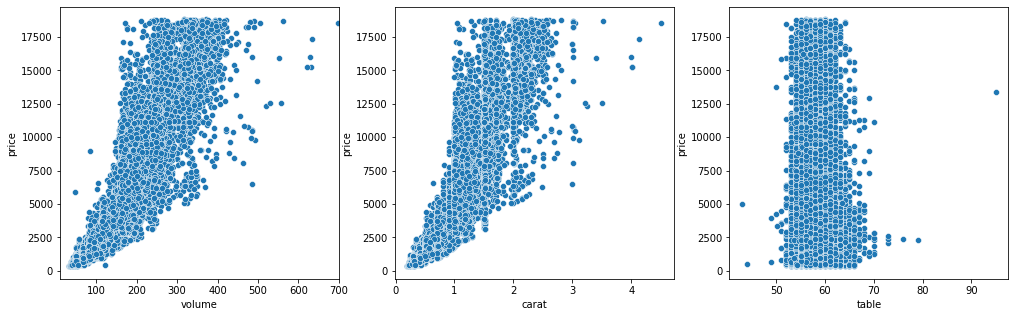

In [40]:
diamonds_train['volume'] = diamonds_train['x'] * diamonds_train['y'] * diamonds_train['z']

fig, axes = plt.subplots(1,3, figsize=(17,5))

sns.scatterplot(ax=axes[0], data=diamonds_train, x='volume', y='price').set(xlim=(10,700))
sns.scatterplot(ax=axes[1], data=diamonds_train, x='carat', y='price')
sns.scatterplot(ax=axes[2], data=diamonds_train, x='table', y='price')